# **Reto 2 - AAD -- Regresión logística y métodos de clasificación--**

Integrantes: Dana Isabella Acosta, Santiago Alvarez Barbosa, Lucas Garcia Osorio, Santiago Linares.

Primero importamos las librerias y modulos necesarios para el desarrollo de es este taller. Adicionalmente se indica la funcionalidad de cada una.

In [1]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks")

#Para el analisis de datos 
import statsmodels.api as sm
from statsmodels.gam.api import GLMGam, BSplines
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.mixture import GaussianMixture
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
#--
from sklearn.preprocessing import scale 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
#--
from sklearn.metrics import mean_squared_error
#--
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
#--
from patsy import dmatrix
sns.set()

# PCA, LDA, KNN, LR
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind

**Descripción General:** El proyecto consiste en resolver un problema que plantearemos posteriormente sobre el conjunto de datos `WorldHappiness_Corruption_2015_2020`. Este conjuntos de datos trata sobre la relacion entre *felicidad* y *corrupcion* desde el año 2015 hasta el 2020 en 132 paises del mundo. 

Haremos un analisis al contexto, un análisis exploratorio de datos, y seleccionaremos el mejor modelo al evaluar diferentes técnicas de clasificación como: **modelos lineales generalizados (GLM)** o **modelos aditivos generalizados (GAM)**. Así como proponer un modelo de agrupación usando **modelos mixtos Gaussianos** que ayuden a complementar el análisis.
También se van a involucrar técnicas de reducción de la dimensión como **PCA** y **LDA**, con el fin de mejorar los modelos o ayudar a la visualización de la información.

A continuacion veremos el data set `WorldHappiness_Corruption_2015_2020` seleccionado para este reto. Los datos fueron descargados de Kaggle [1]

In [2]:
df=pd.read_csv('WorldHappiness_Corruption_2015_2020.csv')
df.head()

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.0,88
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.0,91
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.0,79
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.0,86
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.0,90


----------------------------------------------

### 1. Estudiar el contexto del problema a resolver. Realizar un análisis exploratorio de los datos, en donde se realicen conclusiones, mediante gráficas y cálculos estadísticos básicos

#### (a) Descripción del problema, análisis exploratorio y calidad de las conclusiones

#### (b) Descripción del procedimiento, análisis y discusión realizados.


**Descripción del problema:** Con los datos proporcionados queremos calcular el *puntaje mundial de felicidad*. Adicionalmente, al encontrar el puntaje de felicidad por nación, podremos clasificar las naciones en las siguientes  3 categorias:
1. Feliz
2. Neutral 
3. Triste
Con esto no solamente podemos analizar cuales son las variables que afectan la felicidad de las naciones, sino que se pueden encontrar conclusiones interesantes como:
- ¿Cual es la relacion entre la felicidad y la corrupción? ¿Es proporcional o inversamente proporcional?
- ¿Se puede identificar un patrón geografico en términos de las variabeles predictoras? 
- ¿Como ha cambiado la corrupción y la felicidad durante los años mundialmente y en ciertos paises?

**Análisis Exploratorio y Respectivas conclusiones:**

Antes de empezar con el análisis exploratorio, verifiquemos que no haya valores `NaN`

In [3]:
df.isnull().sum()

Country              0
happiness_score      0
gdp_per_capita       0
family               0
health               0
freedom              0
generosity           0
government_trust     0
dystopia_residual    0
continent            0
Year                 0
social_support       0
cpi_score            0
dtype: int64

Ahora si podemos empezar el analisis. Empezemos viendo aspectos generales de la base de datos.

In [4]:
print('Cantidad de Filas y Columnas respectivamente:',df.shape)
print("----")
print('Nombre de columnas del dataset:',df.columns.values)

Cantidad de Filas y Columnas respectivamente: (792, 13)
----
Nombre de columnas del dataset: ['Country' 'happiness_score' 'gdp_per_capita' 'family' 'health' 'freedom'
 'generosity' 'government_trust' 'dystopia_residual' 'continent' 'Year'
 'social_support' 'cpi_score']


Como podemos ver, se tiene 792 observaciones y 13 variables. Recordemos que las observaciones representan los paises del mundo en un año especifico entre el 2015 y 2020.

A continuación explicamos cada variables:
- `Country`: Nombre del País
- `happiness_score`: Respuestas promedias obtenidas de evaluación hecha por Gallup World Poll (respuestas van del 0-10)
- `gdp_per_capita`: Contribución del PIB al puntaje de felicidad
- `family`: Contribución de la familia al puntaje de felicidad
- `health`: Contribución de la esperanza de vida en el puntaje de felicidad  
- `freedom`: Contribución de la libertad en el puntaje de felicidad 
- `generosity`: Valor numérico calculado en base a la percepcion de generosidad del pais
- `government_trust`: Contribución de la percepción de corrupción en el pais al puntaje de felicidad
- `dystopia_residual`: puntaje basado en una comparación hipotetica a un pais imaginario que es el mas triste del mundo 
- `continent`: Region del país 
- `year`: Año de la observación 
-`social_support`: Contribución del soporte social (familia, amigos cercanos, relativos) al puntaje de felicidad
-`cpi_score`: Indice de percepción de corrupción. Rankea los paises segun sus niveles percibidos de corrupción


Teniendo en cuenta nuestro problema planteado anteriormente, la variable que queremos predecir es `happiness_score` y las demás variables restantes serán las variables predictoras.

Con la función `describe()` podemos obtener una descripción de cada una de las variables en nuestro dataframe. Esto para sacar conclsuiones tempranas de cada uno y obtener mejor entendiemiento de los datos 

In [5]:
df.describe()

,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,Year,social_support,cpi_score
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,5.473310,0.929217,0.504998,0.648691,0.427016,0.212440,0.125720,1.379277,2017.500000,0.609302,44.327020
std,1.124726,0.385774,0.552736,0.232261,0.148003,0.121660,0.109032,1.075276,1.708904,0.640754,19.508833
min,2.566900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,0.000000,11.000000
25%,4.590750,0.644242,0.000000,0.510070,0.325433,0.125784,0.052862,0.000000,2016.000000,0.000000,30.000000
50%,5.485500,0.994544,0.000000,0.685397,0.439621,0.197000,0.089000,1.731948,2017.500000,0.176214,38.000000
75%,6.300500,1.228677,1.040410,0.815641,0.546280,0.273250,0.154250,2.236894,2019.000000,1.268250,57.000000
max,7.808700,2.096000,1.610574,1.141000,0.724000,0.838075,0.551910,3.602140,2020.000000,1.644000,91.000000


Analizando con mas detalle ciertas variables obtenemos las siguientes observaciones acerca de nuestros datos: 

- El puntaje de felicidad mundial es relativamente alto teniendo en cuenta que el promedio tiene un valor de 5.47 mientras que el maximo es de 7.81
- En promedio, mundialmente se tiene una percepción alta de corrupción. Esto es corroborado al ver que se tiene un valor bajo de confianza al gobierno
- Como se tiene un valor de 0.42 en promedio de la variable de libertad, se puede intuir que influye mucho la percepsión de la libertad con la felicidad

Ahora veamos las correlaciones entre las variables. Primero veamos las gráfica de dispersión de `happiness_score` con respecto a las deamas variables independientes.

In [6]:
# Variables predictoras
features = df.columns[2:].values.tolist()
features.insert(0,df.columns[0])
X = df[features]

# Variable que queremos predecir
y = df["happiness_score"]

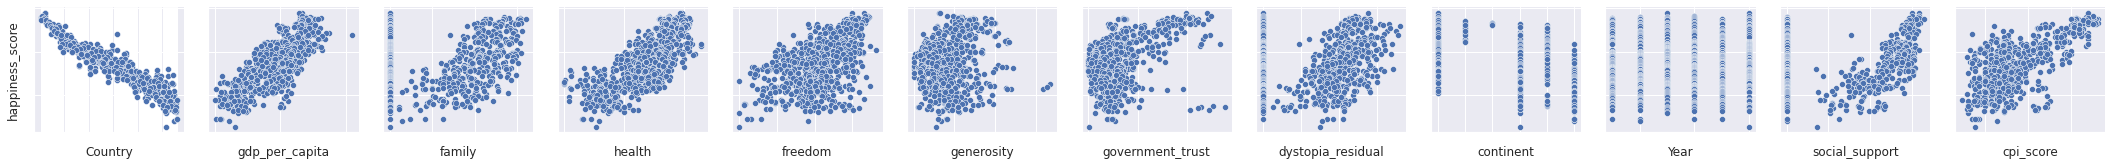

In [7]:
# Gráficas de dispersión
g1 = sns.pairplot(df, y_vars = df.columns[1], x_vars = features)
g1.set(xticklabels=[])
g1.set(yticklabels=[])

A primera vista podemos ver que se tiene una relación proporcional entre nuestra variable a predecir y la mayoria de las variables predictoras. Adicionalmente podemos ver que hay una variedad de la felicidad de los 132 paises observados

Ahora veamos esta información con con la función `heatmap` de seaborn.

En este caso, valores cercanos a 1 y color claro representan correlaciones altas mientras que colores oscuros y valores negativos representan correlación baja  

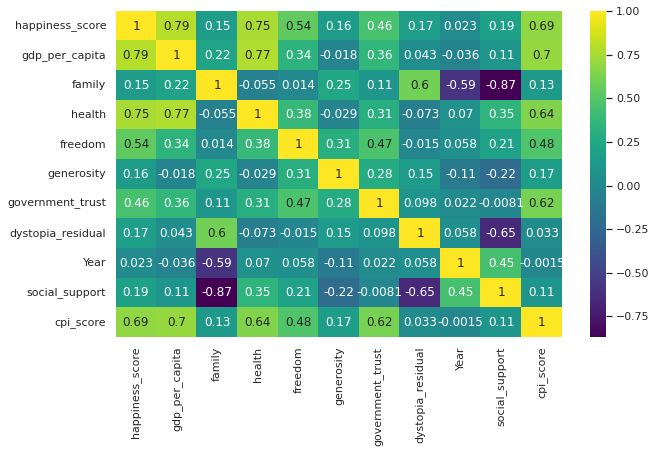

In [8]:
# Mapa de Calor 
sns.set(rc = {'figure.figsize':(10,6)})
sns.heatmap(df.corr(), annot= True,  cmap='viridis')

Al analizar más a profundidad este mapa de calor podemos ver lo siguiente con respecto a nuestra variable objetivo `happiness_score`:
- Tiene alta correlación con las variables `gdp_per_capita`, `health`, `freedom` y `cpi_score`
- Mientras que tiene correlación baja con `family`, `generosity` y `social_support`

En términos generales podemos ver:
- Las variables `family` y `social_support` tiene la correlación muy baja. Lo cual es muy interesante ya que familia hace parte de soporte de la sociedad 
- `health` y `gdp_per_capita` tienen relación alta como `cpi_score` y `health`


**Descripción del Procedimiento y Metodología**

En la proxima sección tendremos el siguiente procedimineto y su respectiva metodología:
1. Limpiar los datos. Agregar labels para poder hacer la clasificación. Recordar que este análisis se hará por los años que contiene la base de datos
2. Separar los datos en datos de prueba y entrenamiento que posteriormente serán usados 
3. Evaluaremos diferentes tipos de modelos como GLM, regresión logística, LDA, KNN entre otros mediante cross-validation
4. Desarrollar un modelo de clustering usando modelos mixtos Gaussianos y ver que tan bueno es al clasificar

----------------------

### 2 Realizar un Jupyter Notebook en el que se describan claramente el problema, el desarrollo, análisis, metodología y los procedimientos desarrollados y las pertinentes conclusiones que obtiene en el contexto del problema considerado. El código del mismo debe estar bien documentado y organizado


#### (a) Involucrar técnicas de reducción de la dimensión (PCA, LDE) ya sea para mejorar el pipeline completo del proceso o para ayudar a visualizar la información de los datos.



Como vamos hacer modelos de clasificación, debemos agregar una columna a los datos que nos indique a que clase pertenece. Recordemos que anteriormente definimos tres clases. A continuación definimos claramente como se separan las observaciones en estas clases
1. Feliz (3): `happiness_score` mayor a 6
2. Neutral (2): `happiness_score` es mayor igual a 4 y es menor o igual a 6  
3. Triste (1): `happiness_score` es menor a 4

Con esta información entonces debemos agregar la variable `label` a nuestro dataset.


In [9]:
# Funcion recursiva para agregar etiqueta al dataframe
def label(row):
  if row["happiness_score"] > 6:
    return 3
  elif (row["happiness_score"] <= 6) and (row["happiness_score"] >= 4):
    return 2
  else:
    return 1

# Agregamos etiqueta al dataframe
df["label"] = df.apply(label, axis=1)

Veamos nuestro nuevo dataframe y adicionalmente veamos la repartición de las clases

In [10]:
df.head()

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score,label
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.0,88,3
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.0,91,3
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.0,79,3
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.0,86,3
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.0,90,3


In [11]:
df["label"].value_counts()

2    449
3    260
1     83
Name: label, dtype: int64

Teniendo en cuenta nuestra separación de clases, se tiene más paises considerados neutrales, seguido por paises felices y por últimos los tristes. Aunque hubiera sido prefereible tener unas clases más balanceadas, consideramos este una buena separación teniendo en cunta el promedio, minimo y maximo del puntaje de felicidad

Ahora, para los métodos que usaremos, PCA, LDA, Regresión logística y KNN, muchos de estos únicamente acepta aquellas variables que son continuas, es decir que variables como `Country`, `continent`, y `Year`, no se tendrá en cuenta.

Por lo tanto vamos a quitar dichas columnas.

In [12]:
df.drop("Country", inplace=True, axis=1)
df.drop("continent", inplace=True, axis=1)
df.drop("Year", inplace=True, axis=1)

In [13]:
df.head()

,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,social_support,cpi_score,label
0,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,0.0,88,3
1,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,0.0,91,3
2,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,0.0,79,3
3,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,0.0,86,3
4,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,0.0,90,3


Adicionalmente separemos los datos en datos de entrenamiento y de prueba

In [14]:
# Escogemos variables predictoras y la variable que queremos predecir 
features = df.columns[:-1].values.tolist()
X = df[features]
y = df["label"]

#Separción de datos
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.2) 

#Se vuelven DataFrames
X_train = pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)

In [15]:
print('Training Data: ', X_train.shape, y_train.shape)
print('Testing Data:', X_test.shape, y_test.shape)

Training Data:  (633, 10) (633, 1)
Testing Data: (159, 10) (159, 1)


**Principal Component Analisis**

Como ya nuestros dataset únicamente contienen datos continuos, podemos aplicar PCA. Sin embargo, primero debemos estandarizar los datos  

In [16]:
scaled_X = StandardScaler().fit_transform(X)

Ahora si podemos aplicar PCA con el proposito de reducir la dimensionalidad de 10 a 2.

In [17]:
pca = PCA(n_components=2)

pca_features = pca.fit_transform(scaled_X)
 
print('Shape before PCA: ', df.shape)
print('Shape after PCA: ', pca_features.shape)
 
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2'])

Shape before PCA:  (792, 11)
Shape after PCA:  (792, 2)


In [18]:
pca_df

,PC1,PC2
0,4.087016,2.414199
1,4.224628,2.512457
2,3.391390,2.563963
3,4.130249,2.263686
4,3.998500,2.319195
...,...,...
787,-0.732493,-1.769267
788,-1.414521,-0.812089
789,-0.045285,-0.496060
790,-2.701023,-1.193623


In [19]:
pca.explained_variance_

array([3.93402046, 2.57444112])

Como podemos ver, se pudo reducir la dimencionalidad a 2 dimensiones. Adicionalmente se puede ver cuanta de la varianza es explicada por cada componente principal

Ahora lo que podemos hacer es ver la gráfica de los dos componentes principales con respecto a nuestros labels


In [20]:
pca_df['label'] = y

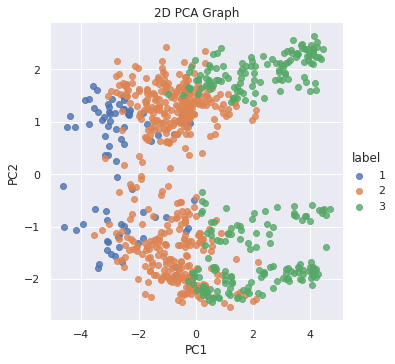

In [21]:
sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_df, 
    hue='label', 
    fit_reg=False, 
    legend=True
    )
 
plt.title('2D PCA Graph')
plt.show()

#### (c) Realizar modelos de regresión logística, análisis discriminante lineal, KNN

**Regresion logistica**

In [22]:
df

,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,social_support,cpi_score,label
0,7.5370,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,0.000000,88,3
1,7.5220,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,0.000000,91,3
2,7.5040,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,0.000000,79,3
3,7.4940,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,0.000000,86,3
4,7.4690,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,0.000000,90,3
...,...,...,...,...,...,...,...,...,...,...,...
787,3.4789,0.997549,0.000000,0.494102,0.509089,0.033407,0.101786,0.257241,1.085695,60,1
788,3.4762,0.457163,0.000000,0.442678,0.509343,0.271541,0.203881,0.718963,0.872675,38,1
789,3.3123,0.343243,0.000000,0.572383,0.604088,0.235705,0.485542,0.548445,0.522876,54,1
790,3.2992,0.425564,0.000000,0.375038,0.377405,0.151349,0.080929,0.841031,1.047835,24,1


In [23]:
# Escogemos variables predictoras y la variable que queremos predecir 
features = df.columns[2:].values.tolist()
features.insert(0,df.columns[0])
X = df[features]
y = df["label"]
# y = df["happiness_score"]

#Separción de datos
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.2) 

#Se vuelven DataFrames
X_train = pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)

In [24]:
modelo = LogisticRegression(penalty='none').fit(X = X_train, y = y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Accuracy de entrenamiento:", modelo.score(X, y))

Intercept: [ 440.27615168  370.91143119 -811.18758288]
Coeficiente: [('happiness_score', 116.60777180630974), ('family', 5.0673928770229795), ('health', -119.60431956819262), ('freedom', 69.42909582541603), ('generosity', 117.90466868932312), ('government_trust', 51.030454254439036), ('dystopia_residual', 17.395895662980546), ('social_support', 71.14206958626262), ('cpi_score', 1.075993895002228), ('label', -556.2667383827632)]
Accuracy de entrenamiento: 0.9974747474747475


**LDA**

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

ldamodel = classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

[[23  2  0]
 [ 2 83  2]
 [ 0  3 44]]
Accuracy 0.9433962264150944


**KNN**

Para KNN note que nuestro objetivo es la clasificacion en tres grupos: Feliz, Neutral y Triste. Por tanto, el valor que utilizaremos para K sera 3.

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

Las variables X_train, Y_train, X_test y Y_test han sido modificadas con los modelos anteriores, por lo tanto, vamos a volver a cargarlas:

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.2) 

X_train = pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)

# Note nuevamente que se esta utilizando una estandarizacion de los datos
# esto con el fin de. tener mejores resultados

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
n_neighbors = 3
 
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

Una vez creado el modelo vamos a empezar a evaluar su desempeño:

In [32]:
print("Precision de KKN con K=3, datos de entrenamiento: ", knn.score(X_train, y_train))

Precision de KKN con K=3, datos de entrenamiento:  1.0


In [33]:
print("Precision de KKN con K=3, datos de test:", knn.score(X_test, y_test))

Precision de KKN con K=3, datos de test: 1.0


Como se puede ver, la precision del modelo es muy alta, 100% tanto en los datos de entrenamiento como en los datos de test. Al hacer pruebas, sin la estandarizacion, la precision del modelo baja a un 85%.

Ahora confirmemos los datos de la precision con la matriz de confusion:

In [34]:
prediccion = knn.predict(X_test)
print(confusion_matrix(y_test, prediccion))
print(classification_report(y_test, prediccion))

[[25  0  0]
 [ 0 87  0]
 [ 0  0 47]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        87
           3       1.00      1.00      1.00        47

    accuracy                           1.00       159
   macro avg       1.00      1.00      1.00       159
weighted avg       1.00      1.00      1.00       159



Ahora vamos a confirmar que el valor de K que nos da mejores resultados es 3. Esto es debido a las categorias  que planteamos para la resolucion de nuestro trabajo.

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

([<matplotlib.axis.XTick at 0x7f7b7d851090>,
 <a list of 17 Text major ticklabel objects>)

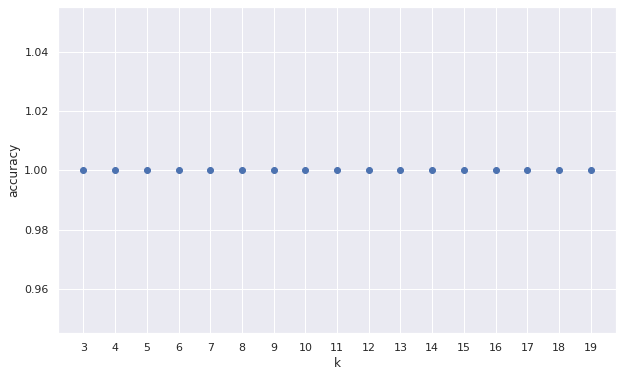

In [35]:
valores_de_k = range(3, 20)
scores = []
for k in valores_de_k:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(valores_de_k, scores)
plt.xticks(valores_de_k)

Note que todos tienen un accuracy de 100%.  Sin embargo, esta informacion no es muy util para obtener conclusiones acerca del valor de K, por lo que utilizaremos las variables sin estandarizar:

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.2) 

X_train = pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

([<matplotlib.axis.XTick at 0x7f7b7d718250>,
 <a list of 17 Text major ticklabel objects>)

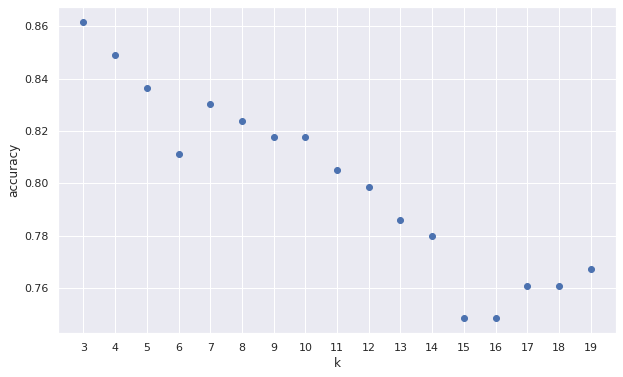

In [37]:
valores_de_k = range(3, 20)
scores = []
for k in valores_de_k:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(valores_de_k, scores)
plt.xticks(valores_de_k)

Con estos resultados se confirma nuestra hipotesis, el valor de K que da mejor precision es k=3.

#### (d) Evaluar y seleccionar los modelos usando validación cruzada. Y posteriormente evaluar el modelo sobre un conjunto independiente de prueba.

In [38]:
from sklearn.decomposition import PCA

In [39]:
scoring = 'accuracy'

In [40]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
	kfold = KFold(n_splits=10, random_state=None)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

LR: 0.984201 (0.021186)
LDA: 0.957440 (0.018483)


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

KNN: 0.881523 (0.035587)
NB: 1.000000 (0.000000)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

**LDA:** 0.957440 (0.018483)

**Regresion logistica:** 0.984201 (0.021186) 

**KNN:** 0.881523 (0.035587)

**Gaussian:** 1.000000 (0.000000)

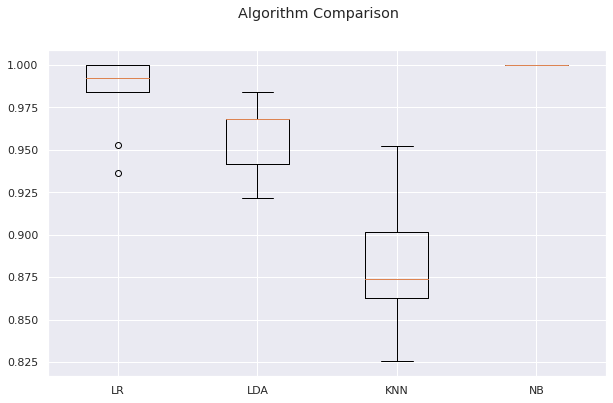

In [41]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [42]:
modelo = LogisticRegression(penalty='none').fit(X = X_test, y = y_test)
LogisticRegression(penalty='none').fit(X = X_test, y = y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(penalty='none')

In [43]:
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Accuracy de entrenamiento:", modelo.score(X, y))

Intercept: [  98.04030972   35.84351512 -133.88382484]
Coeficiente: [('happiness_score', 18.06813161990618), ('family', -12.170040596473351), ('health', -5.4666715355386915), ('freedom', 16.32851334833276), ('generosity', 19.94771065684839), ('government_trust', 2.864020158552758), ('dystopia_residual', 5.763524212775049), ('social_support', 12.937460866120967), ('cpi_score', 0.14533437614126352), ('label', -113.07916628370003)]
Accuracy de entrenamiento: 1.0


#### (e) Desarrollar un modelo de clustering usando modelos mixtos Gaussianos, justificando el numero de clusters seleccionados y comparando los resultados con las etiquetas verdaderas (si las hay)

Primero, daremos un vistazo a nuestro dataset, el cual no contara con la columna label, debido a que esta sera a la que queremos lleagr mediante clusters

In [44]:
data=df[['happiness_score','gdp_per_capita','family','health','freedom','generosity','government_trust','dystopia_residual','social_support','cpi_score']]
data

,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,social_support,cpi_score
0,7.5370,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,0.000000,88
1,7.5220,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,0.000000,91
2,7.5040,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,0.000000,79
3,7.4940,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,0.000000,86
4,7.4690,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,0.000000,90
...,...,...,...,...,...,...,...,...,...,...
787,3.4789,0.997549,0.000000,0.494102,0.509089,0.033407,0.101786,0.257241,1.085695,60
788,3.4762,0.457163,0.000000,0.442678,0.509343,0.271541,0.203881,0.718963,0.872675,38
789,3.3123,0.343243,0.000000,0.572383,0.604088,0.235705,0.485542,0.548445,0.522876,54
790,3.2992,0.425564,0.000000,0.375038,0.377405,0.151349,0.080929,0.841031,1.047835,24


In [45]:
gmm_model = GaussianMixture(n_components=3, covariance_type="full")

gmm_model.fit(data)

GaussianMixture(n_components=3)

La razon por la cual elegimos 3 clusters es debido a que ya hemos creado 3 labels que etiquetan si un pais es feliz, neutral o triste.

In [46]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
prob = gmm_model.predict_proba(data)
pd.DataFrame(prob)

,0,1,2
0,0.000,1.000,0.000
1,0.000,1.000,0.000
2,0.004,0.996,0.000
3,0.000,1.000,0.000
4,0.000,1.000,0.000
...,...,...,...
787,1.000,0.000,0.000
788,0.899,0.000,0.101
789,1.000,0.000,0.000
790,0.070,0.000,0.930


In [47]:
y_gaussmix=gmm_model.fit_predict(data)
y_gaussmix

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2,
       2, 2, 1, 0, 2, 1, 2, 1, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 0,
       2, 1, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0,
       0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 1, 0, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 0, 1, 2,
       1, 2, 1, 0, 1, 2, 1, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 1, 2, 0, 0, 2,
       2, 2, 2, 1, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2,
       0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 2,
       1, 0, 2, 0, 0, 2, 2, 1, 1, 2, 0, 2, 0, 1, 2,

In [48]:
data['label']=y_gaussmix
data

,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,social_support,cpi_score,label
0,7.537,1.616,1.534,0.797,0.635,0.362,0.316,2.277,0.000,88,1
1,7.522,1.482,1.551,0.793,0.626,0.355,0.401,2.314,0.000,91,1
2,7.504,1.481,1.611,0.834,0.627,0.476,0.154,2.323,0.000,79,1
3,7.494,1.565,1.517,0.858,0.620,0.291,0.367,2.277,0.000,86,1
4,7.469,1.444,1.540,0.809,0.618,0.245,0.383,2.430,0.000,90,1
...,...,...,...,...,...,...,...,...,...,...,...
787,3.479,0.998,0.000,0.494,0.509,0.033,0.102,0.257,1.086,60,0
788,3.476,0.457,0.000,0.443,0.509,0.272,0.204,0.719,0.873,38,0
789,3.312,0.343,0.000,0.572,0.604,0.236,0.486,0.548,0.523,54,0
790,3.299,0.426,0.000,0.375,0.377,0.151,0.081,0.841,1.048,24,2



Al comparar los etiquetados, vemos que los primeros datos pertenecen al mismo cluster, al igual que en ejercicios anteriores, pero por otro lado, vemos que en las ultimas muestras, estas pertenecen a diferentes caegorias, lo cual no coincide con nuestro etiquetado inicial.